In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as npr

import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.optimizers as opt

from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

np.random.seed(69420)

XGBoost version: 1.7.4


## Creating a dataset
We created a dataset which features a sine wave, a square and a circle to classify

In [67]:
def classify(a,b):
    r=0
    if (b>1.2*a):
        r=1
    if (b<1.2*a and b>a):
        r=0
    if (b<a):
        r=1
    #if (b > np.sin(2*a)+a) or (a > 8 and b < 2):
        #r=1
    if ((a-2)**2 + (b-8)**2 < 4):
        r=0
    if ((a-2)**2 + (b-8)**2 < 1):
        r=1
    if b < -(a-5)*(a-11):
        r=0
    if b < -(a-6)*(a-10):
        r=1
    return int(r)

In [68]:
N=3000
X = 10*npr.rand(N,2)
y = np.zeros(N)
for i in range(N):
    y[i]=classify(X[i,0],X[i,1])

Text(0.5, 1.0, 'Data')

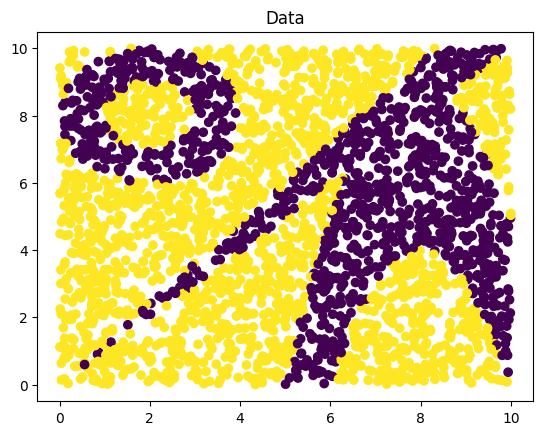

In [69]:
fig, AX = plt.subplots()

AX.scatter(X[:, 0], X[:, 1], c=y)
AX.set_title('Data')

In [70]:
permutation = np.random.permutation(X.shape[0])

train_percentage=0.8
tsize = int(train_percentage*N)

X = X[permutation]
y = y[permutation]

X_train, X_valid = X[:tsize], X[tsize:]
y_train, y_valid = y[:tsize], y[tsize:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0. 1.]
Frequencies in training dataset:  [ 976 1424]


## DNN
We'll use as a starting point the model we optimnized for the first laboratory exercise

In [36]:
model = Sequential()
model.add(Dense(20,input_shape=(2,),activation='relu')) 
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))
nepoch=500

print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainabl

In [37]:
fit = model.fit(X_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(X_valid,y_valid),
               verbose=False)

Epoch 1/500
48/48 [==============================] - 2s 11ms/step - loss: 0.5272 - accuracy: 0.7987 - val_loss: 0.4442 - val_accuracy: 0.8633
Epoch 2/500
48/48 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8529 - val_loss: 0.3928 - val_accuracy: 0.8550
Epoch 3/500
48/48 [==============================] - 0s 5ms/step - loss: 0.3737 - accuracy: 0.8554 - val_loss: 0.3541 - val_accuracy: 0.8650
Epoch 4/500
48/48 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.8546 - val_loss: 0.3432 - val_accuracy: 0.8567
Epoch 5/500
48/48 [==============================] - 0s 5ms/step - loss: 0.3276 - accuracy: 0.8662 - val_loss: 0.3185 - val_accuracy: 0.8750
Epoch 6/500
48/48 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.8642 - val_loss: 0.3040 - val_accuracy: 0.8683
Epoch 7/500
48/48 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.8650 - val_loss: 0.2953 - val_accuracy: 0.8683
Epoch 8/500


Epoch 59/500
48/48 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.8988 - val_loss: 0.1869 - val_accuracy: 0.8950
Epoch 60/500
48/48 [==============================] - 0s 5ms/step - loss: 0.2058 - accuracy: 0.9021 - val_loss: 0.1891 - val_accuracy: 0.9233
Epoch 61/500
48/48 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.9087 - val_loss: 0.1879 - val_accuracy: 0.8967
Epoch 62/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.9062 - val_loss: 0.1889 - val_accuracy: 0.9100
Epoch 63/500
48/48 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.9029 - val_loss: 0.1874 - val_accuracy: 0.9167
Epoch 64/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9075 - val_loss: 0.1943 - val_accuracy: 0.9117
Epoch 65/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9062 - val_loss: 0.1850 - val_accuracy: 0.9167
Epoch 

48/48 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9333 - val_loss: 0.1462 - val_accuracy: 0.9267
Epoch 117/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9342 - val_loss: 0.1423 - val_accuracy: 0.9250
Epoch 118/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9362 - val_loss: 0.1361 - val_accuracy: 0.9367
Epoch 119/500
48/48 [==============================] - 0s 6ms/step - loss: 0.1473 - accuracy: 0.9329 - val_loss: 0.1327 - val_accuracy: 0.9417
Epoch 120/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9304 - val_loss: 0.1483 - val_accuracy: 0.9383
Epoch 121/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9375 - val_loss: 0.1384 - val_accuracy: 0.9367
Epoch 122/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9367 - val_loss: 0.1364 - val_accuracy: 0.9367
Epoch 123/500

48/48 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.9450 - val_loss: 0.1267 - val_accuracy: 0.9450
Epoch 174/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9446 - val_loss: 0.1206 - val_accuracy: 0.9400
Epoch 175/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1260 - accuracy: 0.9433 - val_loss: 0.1266 - val_accuracy: 0.9400
Epoch 176/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.9421 - val_loss: 0.1269 - val_accuracy: 0.9367
Epoch 177/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9379 - val_loss: 0.1174 - val_accuracy: 0.9450
Epoch 178/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9425 - val_loss: 0.1342 - val_accuracy: 0.9383
Epoch 179/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.9463 - val_loss: 0.1240 - val_accuracy: 0.9333
Epoch 180/500

48/48 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9471 - val_loss: 0.1164 - val_accuracy: 0.9417
Epoch 231/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1067 - accuracy: 0.9533 - val_loss: 0.1111 - val_accuracy: 0.9500
Epoch 232/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 0.9521 - val_loss: 0.1200 - val_accuracy: 0.9383
Epoch 233/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.9542 - val_loss: 0.1278 - val_accuracy: 0.9417
Epoch 234/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9500 - val_loss: 0.1150 - val_accuracy: 0.9400
Epoch 235/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1094 - accuracy: 0.9521 - val_loss: 0.1137 - val_accuracy: 0.9417
Epoch 236/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1054 - accuracy: 0.9529 - val_loss: 0.1256 - val_accuracy: 0.9317
Epoch 237/500

48/48 [==============================] - 0s 6ms/step - loss: 0.0951 - accuracy: 0.9571 - val_loss: 0.1232 - val_accuracy: 0.9383
Epoch 288/500
48/48 [==============================] - 0s 6ms/step - loss: 0.1111 - accuracy: 0.9525 - val_loss: 0.1380 - val_accuracy: 0.9400
Epoch 289/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9500 - val_loss: 0.1162 - val_accuracy: 0.9433
Epoch 290/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0980 - accuracy: 0.9575 - val_loss: 0.1077 - val_accuracy: 0.9483
Epoch 291/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0934 - accuracy: 0.9563 - val_loss: 0.1166 - val_accuracy: 0.9417
Epoch 292/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0922 - accuracy: 0.9583 - val_loss: 0.1221 - val_accuracy: 0.9467
Epoch 293/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9550 - val_loss: 0.1390 - val_accuracy: 0.9250
Epoch 294/500

48/48 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9625 - val_loss: 0.0996 - val_accuracy: 0.9567
Epoch 345/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9608 - val_loss: 0.1155 - val_accuracy: 0.9417
Epoch 346/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9596 - val_loss: 0.1053 - val_accuracy: 0.9517
Epoch 347/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0884 - accuracy: 0.9592 - val_loss: 0.1157 - val_accuracy: 0.9467
Epoch 348/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0811 - accuracy: 0.9658 - val_loss: 0.1219 - val_accuracy: 0.9467
Epoch 349/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9613 - val_loss: 0.1297 - val_accuracy: 0.9383
Epoch 350/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9546 - val_loss: 0.1081 - val_accuracy: 0.9450
Epoch 351/500

48/48 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9533 - val_loss: 0.1052 - val_accuracy: 0.9517
Epoch 402/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9621 - val_loss: 0.1169 - val_accuracy: 0.9483
Epoch 403/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9558 - val_loss: 0.1067 - val_accuracy: 0.9517
Epoch 404/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0869 - accuracy: 0.9583 - val_loss: 0.1274 - val_accuracy: 0.9467
Epoch 405/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0831 - accuracy: 0.9621 - val_loss: 0.1177 - val_accuracy: 0.9417
Epoch 406/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.9625 - val_loss: 0.1375 - val_accuracy: 0.9383
Epoch 407/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0842 - accuracy: 0.9638 - val_loss: 0.0989 - val_accuracy: 0.9567
Epoch 408/500

48/48 [==============================] - 0s 5ms/step - loss: 0.0987 - accuracy: 0.9558 - val_loss: 0.1133 - val_accuracy: 0.9400
Epoch 459/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9579 - val_loss: 0.1002 - val_accuracy: 0.9600
Epoch 460/500
48/48 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9613 - val_loss: 0.0943 - val_accuracy: 0.9567
Epoch 461/500
48/48 [==============================] - 0s 6ms/step - loss: 0.0868 - accuracy: 0.9621 - val_loss: 0.1298 - val_accuracy: 0.9400
Epoch 462/500
48/48 [==============================] - 0s 6ms/step - loss: 0.0821 - accuracy: 0.9592 - val_loss: 0.1039 - val_accuracy: 0.9550
Epoch 463/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0823 - accuracy: 0.9621 - val_loss: 0.1043 - val_accuracy: 0.9533
Epoch 464/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9650 - val_loss: 0.1079 - val_accuracy: 0.9533
Epoch 465/500

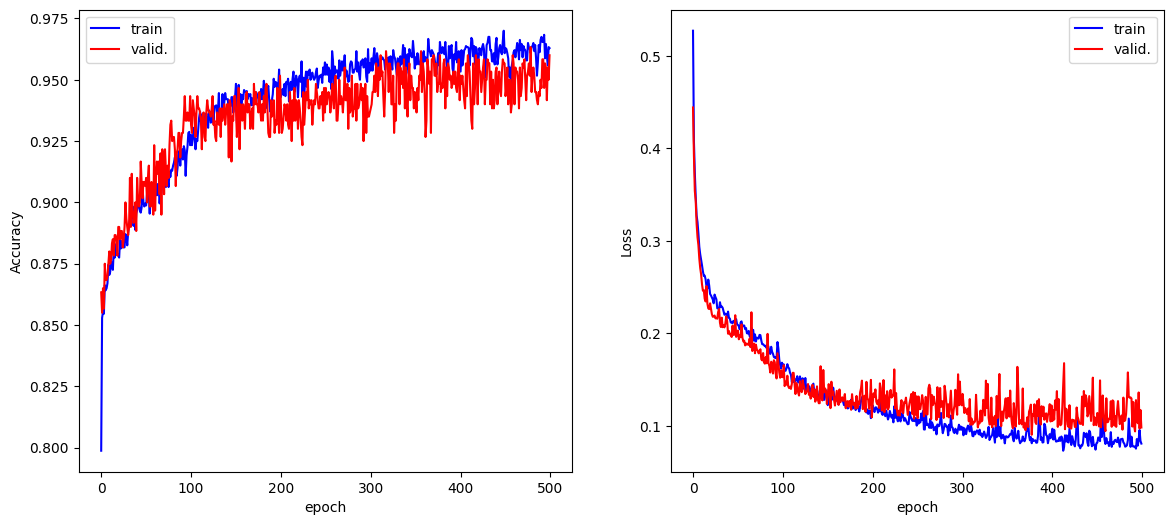

In [38]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [39]:

v=np.linspace(0,10,1000)
grid = 10*npr.rand(N,2)
#grid = np.reshape(np.meshgrid(v,v), (1000,1000,2)) 
pred = model.predict(grid)

94/94 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

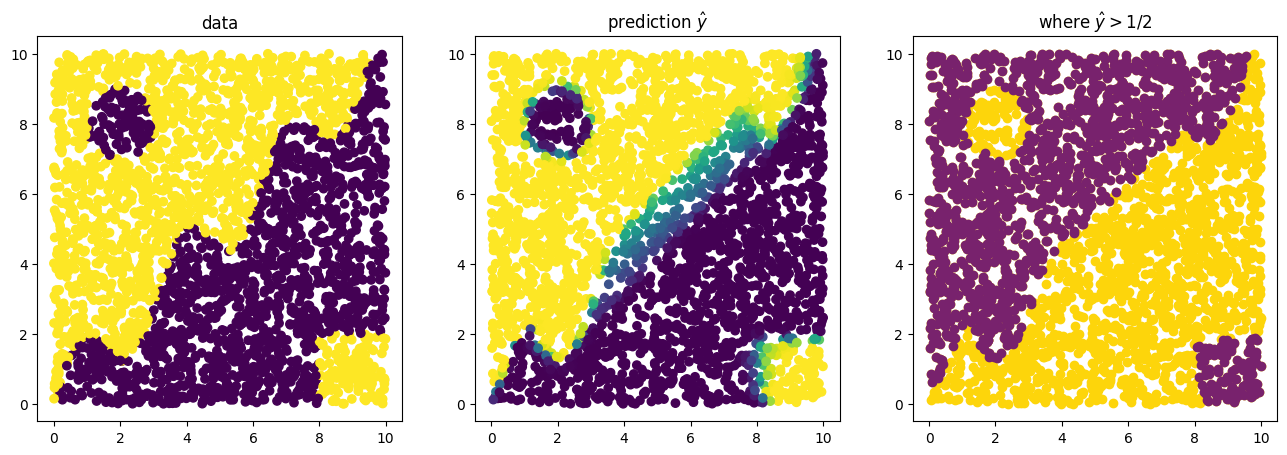

In [40]:
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#FDD50B")
ax.scatter(grid[W1,0],grid[W1,1],c="#78226D")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

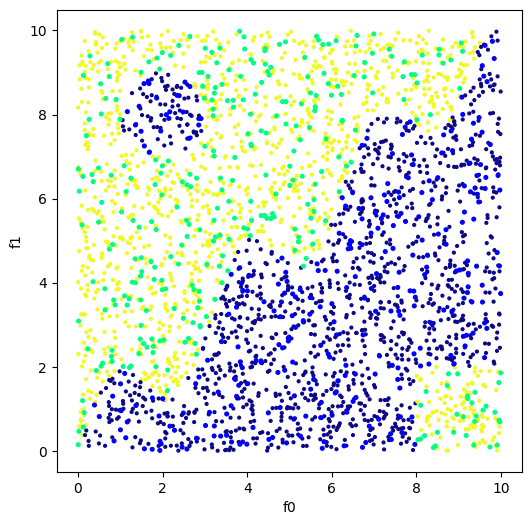

In [41]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

plt.figure(figsize=(6,6))
scat(X_train,y_train)
scat(X_valid,y_valid,cmap="winter",s=7)
plt.show()

In [42]:
def classifyx(clf=GradientBoostingClassifier(),show=False):
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_valid)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(X_valid, y_valid))))

    dx = 0.02
    x_seq=np.arange(0,10+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot = clf.predict(x_plot)
    
    plt.figure(figsize=(6,6))
    plt.title(str(clf))
    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(X_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 3.00%


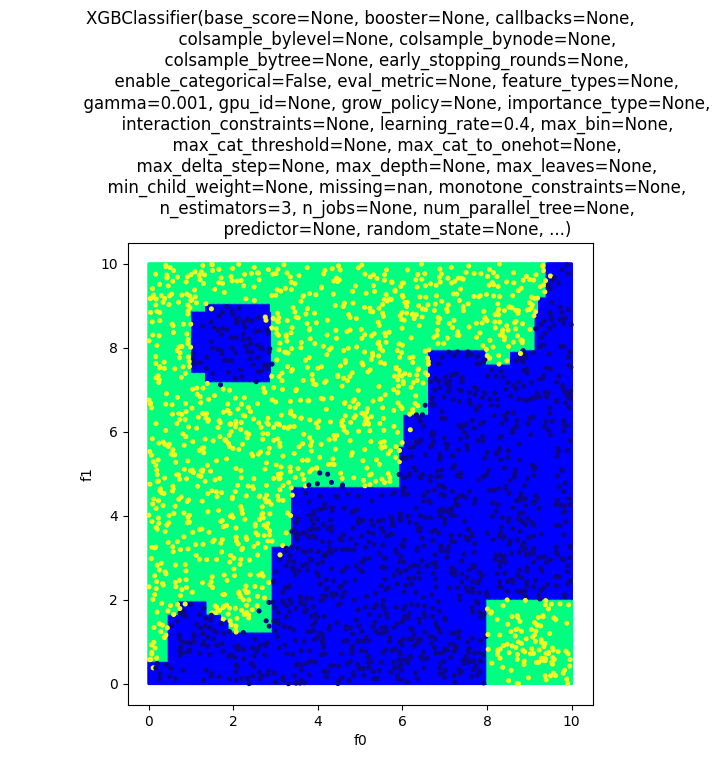

num_trees= 3


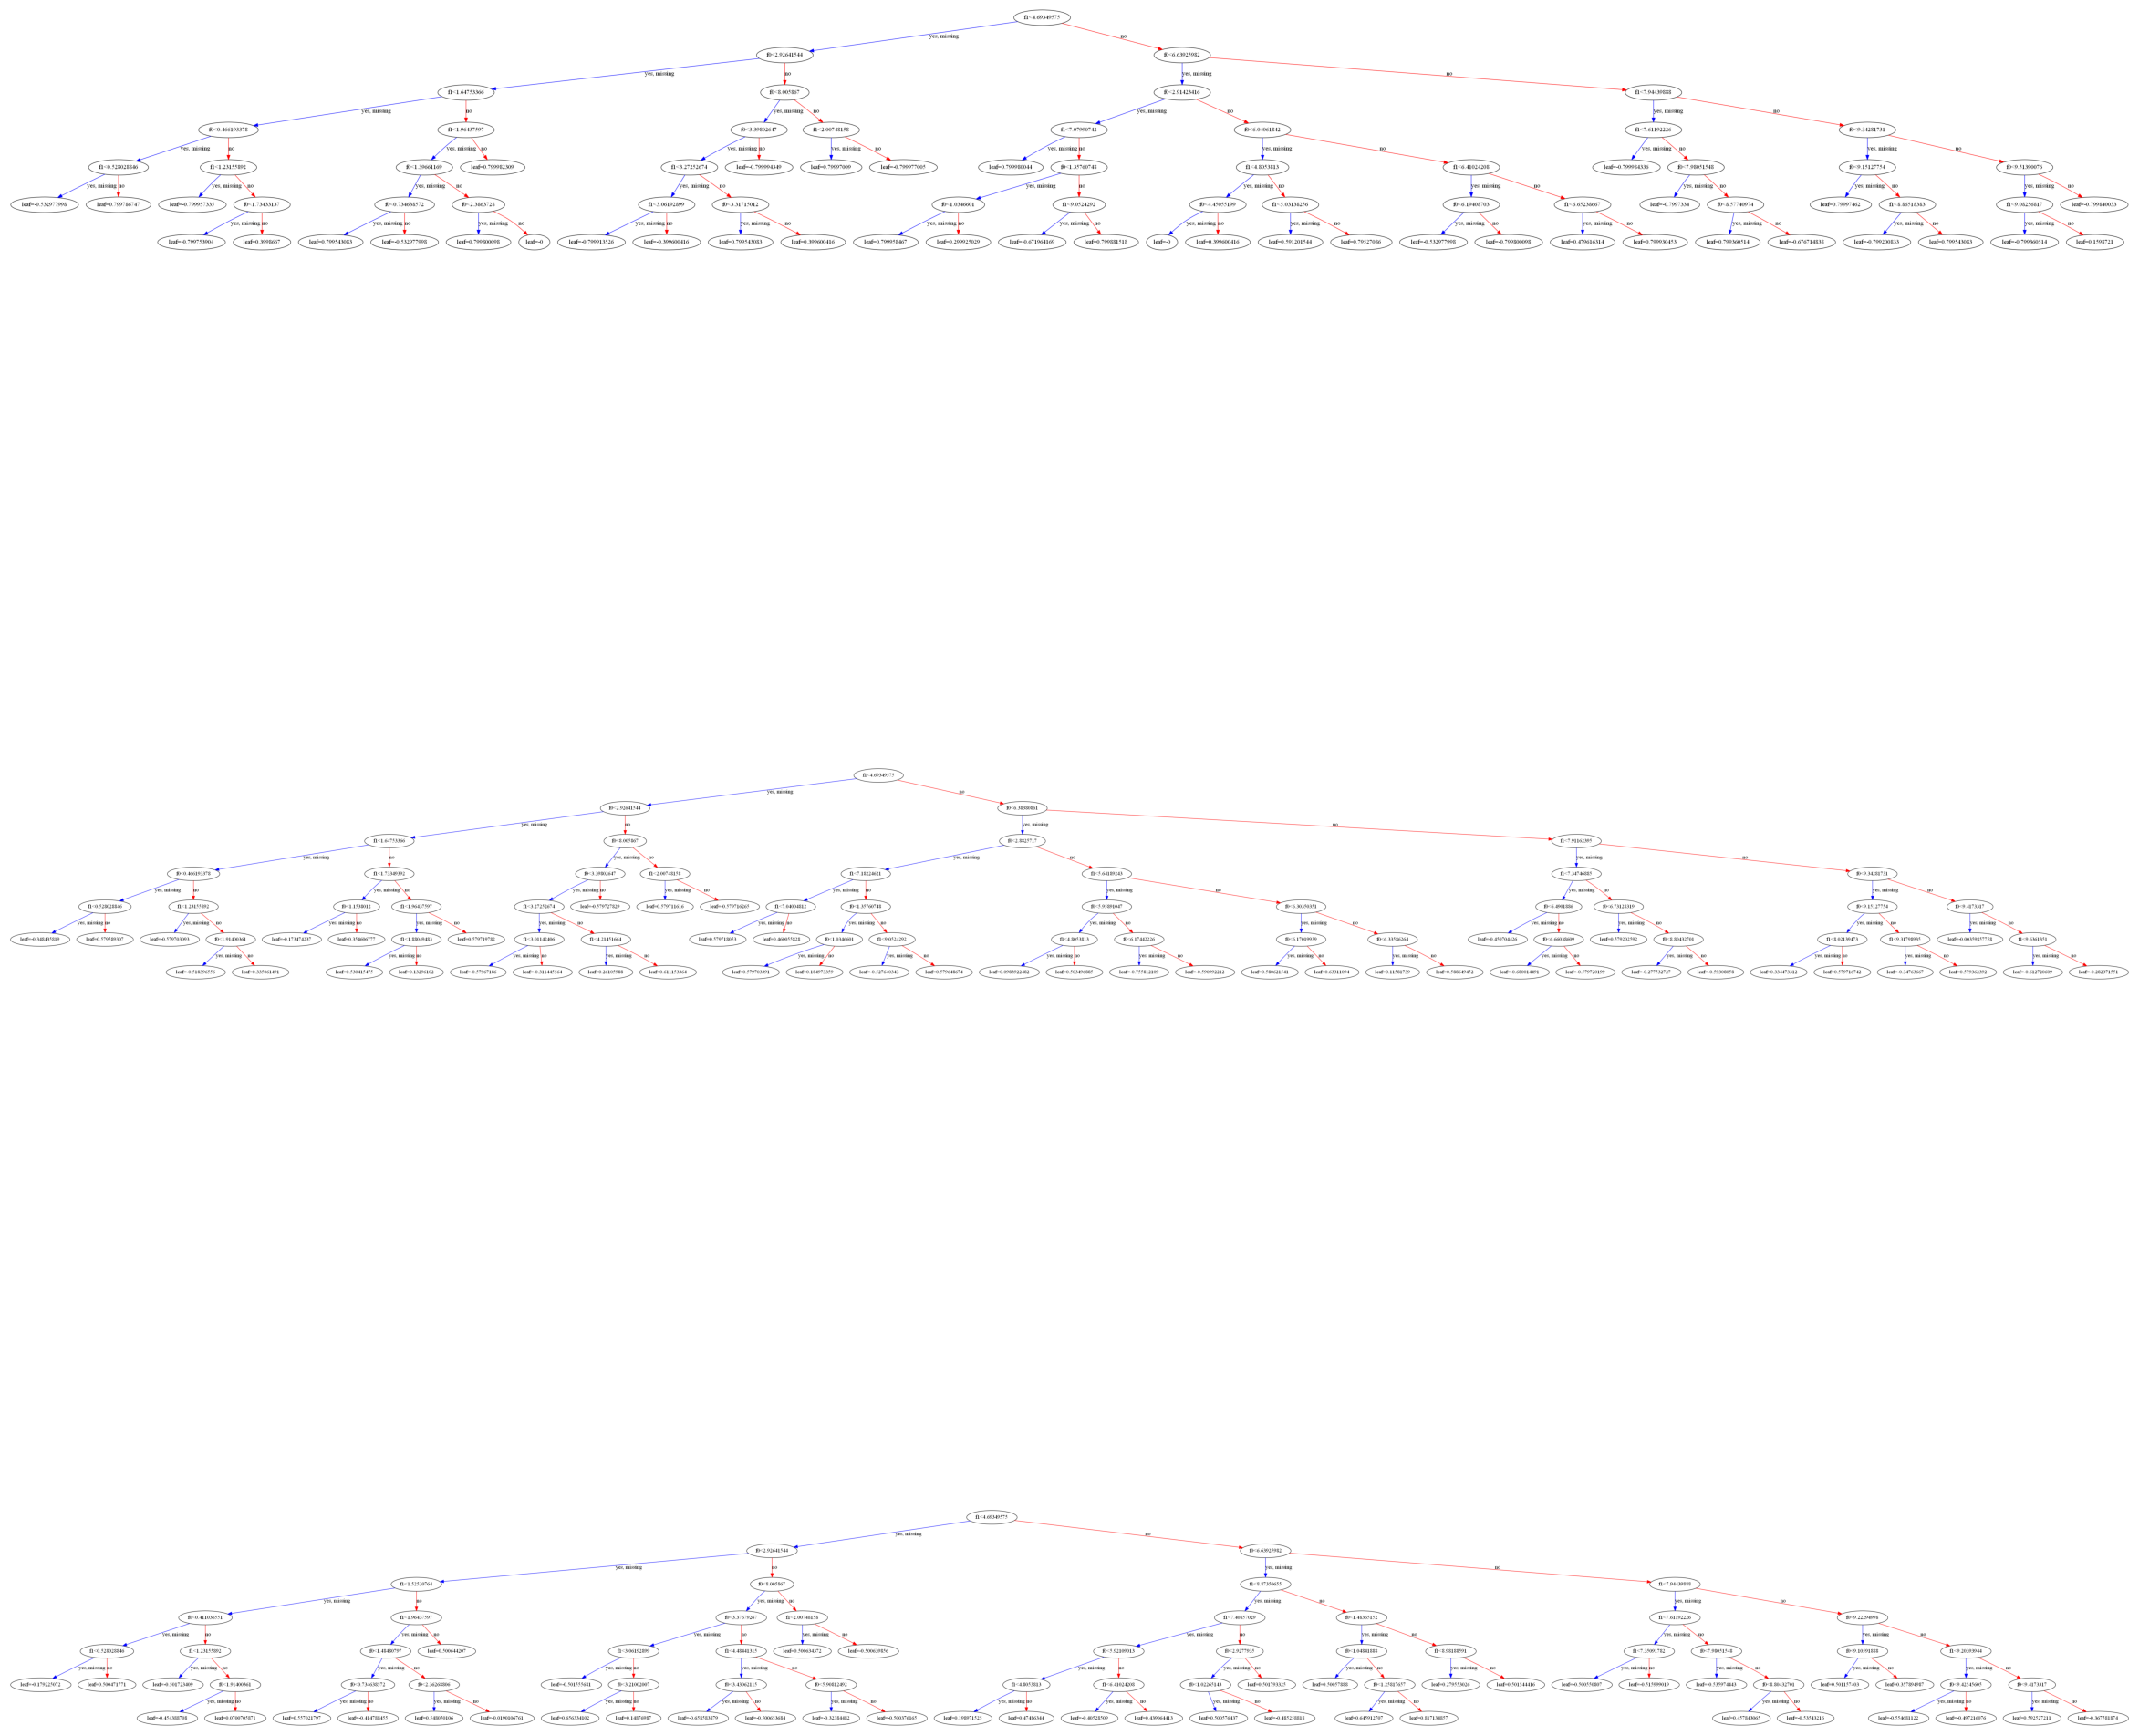

In [43]:
classifyx(XGBClassifier(seed=1,
                        objective='binary:logistic',
                        #objective="reg:squarederror",eval_metric="rmse",
                        learning_rate=0.4,
                        gamma=0.001,
                        reg_lambda=0.001, n_estimators=3),show=False)

# Varying number of samples

### Also, K-fold cross validation

In [ ]:
Ns=[i for i in range(0,N+1, N//10)][1:]
nn_err=[]
xgb_err=[]
for i in Ns:
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    print(i)
    X0=X[:i]
    y0=y[:i]
    
    K=5
    vsize = int(i/K)
    nn_vals=[]
    xgb_vals=[]
    
    for k in range(K):
        try:
            X_train = np.concatenate((X0[(k+1)*vsize:], X0[:k*vsize]))
            y_train = np.concatenate((y0[(k+1)*vsize:], y0[:k*vsize]))
        except:
            if len(X0[:k*vsize])==0:
                X_train = X0[(k+1)*vsize:]
            elif len(X0[(k+1)*vsize:])==0:
                X_train = X0[:k*vsize]
            else:
                print(X0[:k*vsize], X0[(k+1)*vsize])
                raise
        X_valid = X0[k*vsize:(k+1)*vsize]
        y_valid = y0[k*vsize:(k+1)*vsize]
        #print(X_train, X_valid, y_train, y_valid)
        model = Sequential()
        model.add(Dense(20,input_shape=(2,),activation='relu')) 
        model.add(Dense(20,activation='relu'))
        model.add(Dense(20,activation='relu'))
        model.add(Dense(20,activation='relu'))
        model.add(Dropout(0.01))
        model.add(Dense(1,activation='sigmoid'))
        nepoch=500
        
        #print(model.summary())
        
        model.compile(loss='binary_crossentropy',
                      #optimizer='RMSprop',
                      optimizer='adam',
                      metrics=['accuracy'])
        fit = model.fit(X_train, y_train,
                       epochs = nepoch, batch_size = 50,
                       validation_data=(X_valid,y_valid),
                       verbose=0)
        nn_vals.append(1-fit.history["val_accuracy"][-1])
        
        clf = XGBClassifier(seed=1,
                            objective='binary:logistic',
                            #objective="reg:squarederror",eval_metric="rmse",
                            learning_rate=0.4,
                            gamma=1,
                            reg_lambda=0.001, n_estimators=3)
        clf.fit(X_train,y_train)
        
        xgb_vals.append(1-clf.score(X_valid, y_valid))
    nn_err.append((np.mean(nn_vals), np.std(nn_vals)))
    xgb_err.append((np.mean(xgb_vals), np.std(xgb_vals)))

In [ ]:
plt.plot(Ns, [i[0] for i in nn_err], color="red")
plt.fill_between(Ns, [i[0] for i in nn_err]+np.array([i[1] for i in nn_err]), [i[0] for i in nn_err]-np.array([i[1] for i in nn_err]), facecolor='red', alpha=0.3)
plt.plot(Ns, [i[0] for i in xgb_err], color="navy")
plt.fill_between(Ns, [i[0] for i in xgb_err]+np.array([i[1] for i in xgb_err]), [i[0] for i in xgb_err]-np.array([i[1] for i in xgb_err]), facecolor='navy', alpha=0.3)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
Fitting 4 folds for each of 90 candidates, totalling 360 fits
Fitting 4 folds for each of 90 candidates, totalling 360 fits
Fitting 4 folds for each of 90 candidates, totalling 360 fits


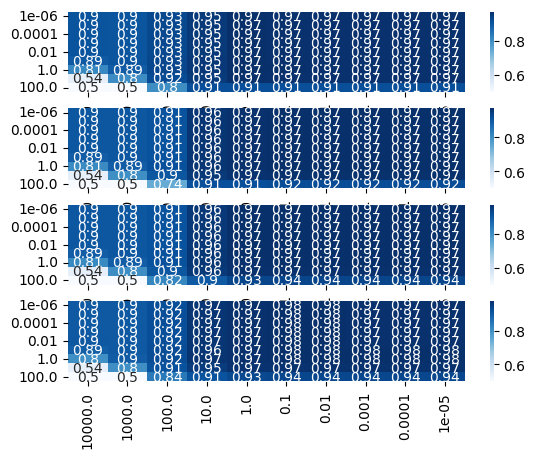

In [44]:
import seaborn as sns

fig, ax = plt.subplots(nrows = 4)


for n_est in range(1,5):
    parameters = {'gamma': [10**i for i in range(-6,3)],
                  'reg_lambda': [10**(-i) for i in range(-4,6)] }

    clf = XGBClassifier(seed=1,
                        objective='binary:logistic',
                        learning_rate=0.4,
                        n_estimators= n_est)

    grid_search = GridSearchCV( estimator=clf,
                                param_grid = parameters,
                                cv = 4,
                                verbose = True)
    grid_search.fit(X,y)

    df = pd.DataFrame( grid_search.cv_results_['mean_test_score'].reshape(len(parameters['gamma']),
                                                                          len(parameters['reg_lambda'])),
                      index=parameters['gamma'], columns=parameters['reg_lambda'])

    sns.heatmap(df, annot=True, cmap='Blues', ax=ax[n_est-1])

errors: 17.83%


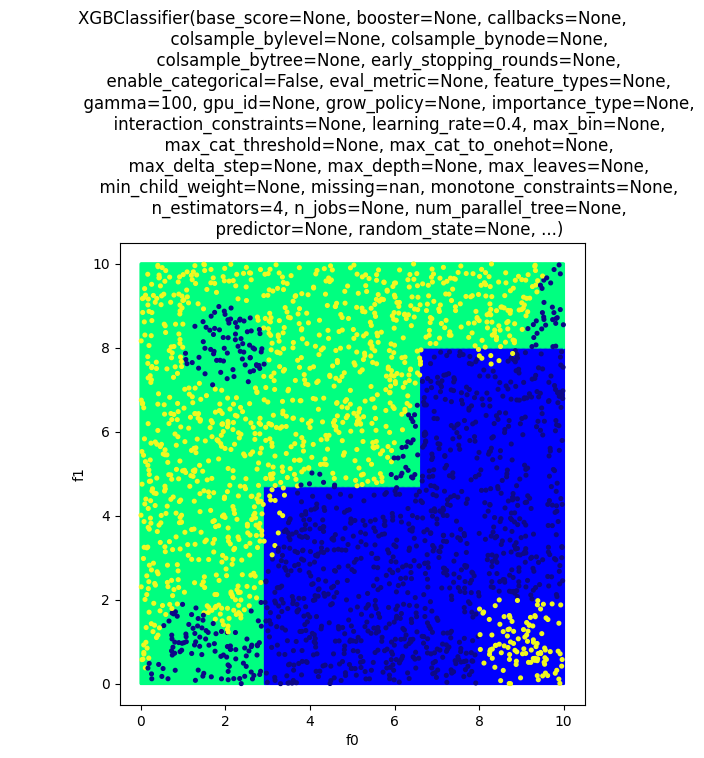

In [46]:
classifyx(XGBClassifier(seed=1,
                        objective='binary:logistic',
                        #objective="reg:squarederror",eval_metric="rmse",
                        learning_rate=0.4,
                        gamma=100,
                        reg_lambda=100, n_estimators=4),show=False)